In [24]:
# import modules

from cMCTS import environment
from cMCTS import mcts
from cMCTS import perturbation

#import dependencies

import json
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300, 300

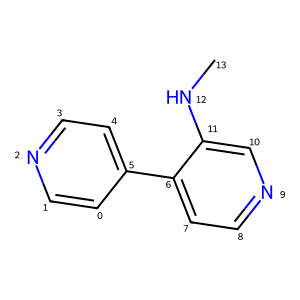

In [30]:
# Define the molecule smiles

smiles = 'c1cnccc1c1ccncc1NC'
Chem.MolFromSmiles(smiles)

# Initialize the Environment

In [31]:
env = environment.Environment(smiles)

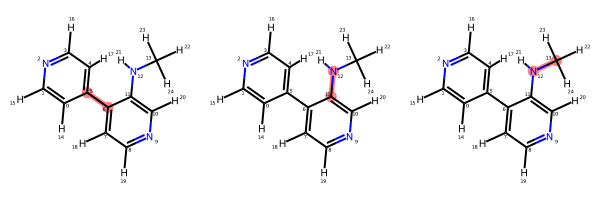

In [32]:
# Draw the molecule with highlighted rotatable bonds

env.draw()

In [33]:
# root_data example

root_data = env.create_root_parameters()
root_data

array([307.56193126, 152.69037703, 330.53371291])

# Initialize the Perturbator

In [34]:
max_mutation = 10 #maximum mutation allowed
perturbator = perturbation.Perturbation(max_mutation) #initialize the perturbator

# Initialize the cMCTS

In [35]:
# read the config file

with open('config_mcts.json') as f:
    config = json.load(f)
    print(config)

{'n_iterations': 200, 'n_expand': 10, 'n_playouts': 20, 'explore_constant': 1.0, 'max_depth': 12, 'a': 3}


In [36]:
# set perturb and evaluate functions 

perturb = perturbator.perturb
evaluate = env.evaluate

In [37]:
# initialize the cMCTS

optimizer = mcts.cMCTS(root_data, perturb, evaluate, **config)

In [38]:
# run optimizer

optimizer.run()

Evaluations made: 231, Best energy yet: 74.69619527747506
Evaluations made: 441, Best energy yet: 74.68771087083802
Evaluations made: 651, Best energy yet: 74.68653345599057
Evaluations made: 861, Best energy yet: 74.68551892156394
Evaluations made: 1071, Best energy yet: 74.68551892156394
Evaluations made: 1281, Best energy yet: 74.68551892156394
Evaluations made: 1491, Best energy yet: 74.68551892156394
Evaluations made: 1701, Best energy yet: 74.68551892156394
Evaluations made: 1911, Best energy yet: 74.68551892156394
Evaluations made: 2121, Best energy yet: 74.68551892156394
Evaluations made: 2331, Best energy yet: 74.68551892156394
Evaluations made: 2541, Best energy yet: 74.68551892156394
Evaluations made: 2751, Best energy yet: 74.68551892156394
Evaluations made: 2961, Best energy yet: 74.68551892156394
Evaluations made: 3171, Best energy yet: 74.68551892156394
Evaluations made: 3381, Best energy yet: 74.68551892156394
Evaluations made: 3591, Best energy yet: 74.68551892156394
E

In [39]:
# best parameters found

optimizer.parameter_list[optimizer.score_list.index(min(optimizer.score_list))]

array([289.55773211, 110.17296557, 358.14419406])

In [40]:
# write the optimization data to a file

optimizer.write()

Results written to mcts_results.json file.


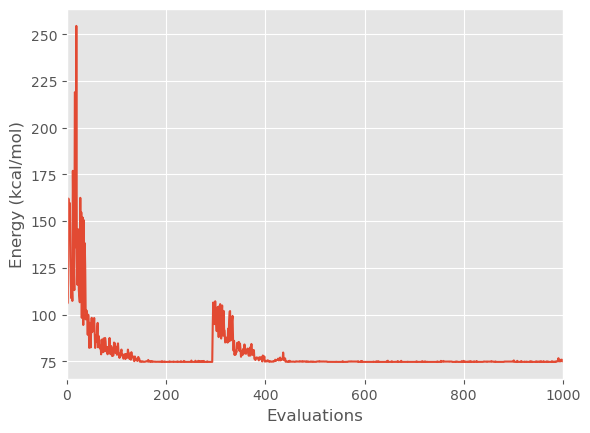

In [41]:
# plot the optimization process

optimizer.plot_minimization(lim_iterations=[0,1000])

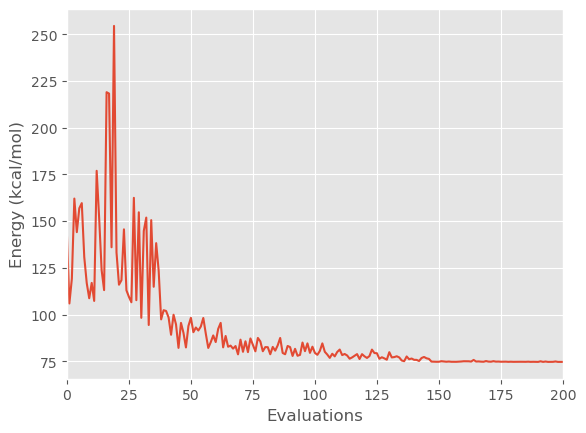

In [42]:
optimizer.plot_minimization(lim_iterations=[0,200])